# Problem Statement 
Your task for this homework will be to perform EDA (Exploratory Data Analysis) and predict if a person is prone to a heart attack (0 or 1) 

Question: Is this a classification or regression task and why?

<span style="color: green;">
This is a classification task since we are dealing with two possible outcomes, prone to heart attack and not prone to heart attack people. 

In [1]:
# first lets load the necessary libraries that we'll need for this assignment

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

### Step 1
#### Begin by importing the data and displaying the first 5 observations. 

In [2]:
# lets load the data
heart_df = pd.read_csv('data.csv')

# displaying the first 5 rows
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### **Answer the following using Pandas**

#### How many observations are there in total?

In [3]:
size_df = heart_df.shape[0]
print(f' There are {size_df} observations in total')

 There are 303 observations in total


#### Are there any missing values? 

In [4]:
# method 1: 
print(heart_df.isna().sum())

# # methods 2: 
# print(heart_df.isnull().any())


if not heart_df.isnull().values.any():
    print("No missing data")
else:
    missing_count = heart_df.isnull().sum().sum()
    print(f"There are {missing_count} observations missing")

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
No missing data


<span style="color: green;">
    
**No, there are is not any missing values.**

#### How many **unique** values are in each column?

In [5]:
# number of unique values in each column
# unique_values = heart_df.nunique()
# print(unique_values)

# display purposes
for col in heart_df.columns:
    unique_count = heart_df[col].nunique()
    print(f"In column {col} there are {unique_count} unique values.")

In column age there are 41 unique values.
In column sex there are 2 unique values.
In column cp there are 4 unique values.
In column trtbps there are 49 unique values.
In column chol there are 152 unique values.
In column fbs there are 2 unique values.
In column restecg there are 3 unique values.
In column thalachh there are 91 unique values.
In column exng there are 2 unique values.
In column oldpeak there are 40 unique values.
In column slp there are 3 unique values.
In column caa there are 5 unique values.
In column thall there are 4 unique values.
In column output there are 2 unique values.


#### Which columns will you treat as categorical, which will you take as continuous, and why?

In [6]:
print(heart_df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


<span style="color: green;">
    
**I will treat columns 'sex', 'cp', 'restecg', 'exng', and 'output'as categorical because these values are either 'female' or 'male', 'yes' or 'no' thus these columns can be treated as categorical  type. <br>
The rest I will treat as continous because they represent measurements or quantity of some observation.**

### Step 2

Create a plot of your target variable on the x-axis and counts on the y-axis.Create a plot of your target variable on the x-axis and counts on the y-axis.

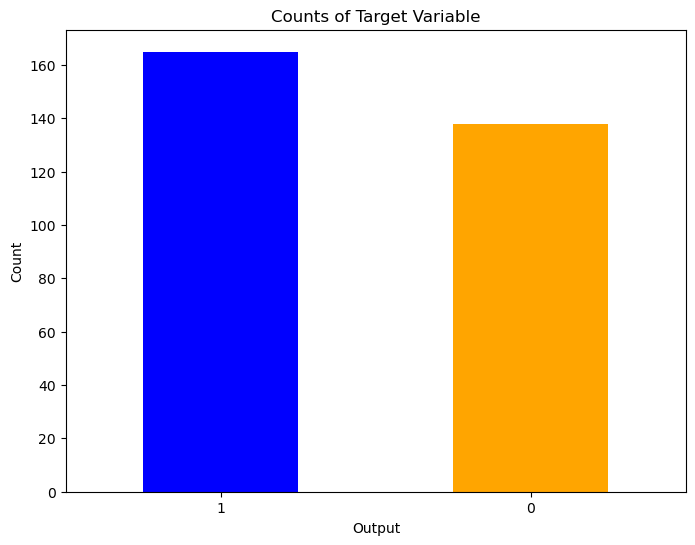

In [7]:
# Plot the counts of the target variable
plt.figure(figsize=(8, 6))
target_var = heart_df['output']

# ploting target variables 
target_var.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Output') # x-axis
plt.ylabel('Count') # y-axis 
plt.title('Counts of Target Variable')
plt.xticks(rotation=0)
plt.show()

#### Question: Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not.

<span style="color: green;">

**The dataset seem to be balanced because there seem to be equal parts of people who are prone to heart attacks and the other portion that are not prone to them.**

#### Question: Is working with a balanced dataset important? Why or why not?

<span style = "color: green" >

Working with a balanced dataset ensures bias reduction in predictive models, which is crucial for improving accuracy and fairness. A balanced dataset helps models perform better by learning equally from all classes, thus **avoiding bias towards any one class**.

<br>

Another important reason for working with balanced datasets is the ease of diagnosing and understanding errors. **When all attributes are scaled and balanced, it becomes easier to pinpoint mistakes and improve the model based on specific issues**.

#### Question: How can we deal with an imbalanced dataset?

<span style = "color:green">

One common method is **class weighting**, which adjsut the weights of the class in the loss function.
<br> 

This technique handles imbalanced datasets by **assigning different weights to the classes** in the **loss function**. **This penalizes the misclassifications of the minority class more heavily than the ones made by the majority class**. 

<br> 
    
This **encourages the model to pay more attention** to the **minority class**, thereby improving its accuracy overall on future predictions. 

### Step 3

Create a count plot for each of your **categorical variables**. That is, the variable on the x-axis andcounts on the y-axis. Here’s an example of sex and slp:

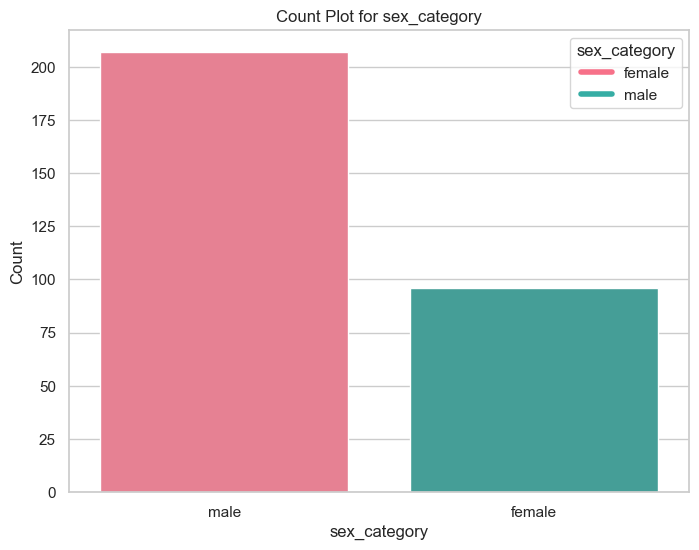

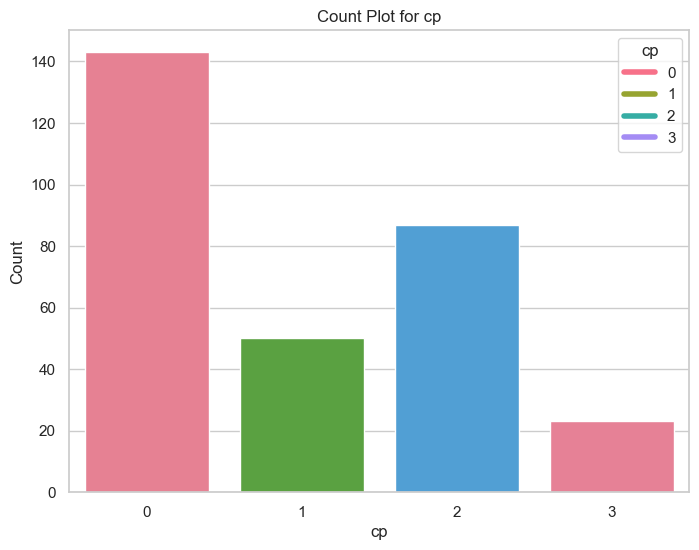

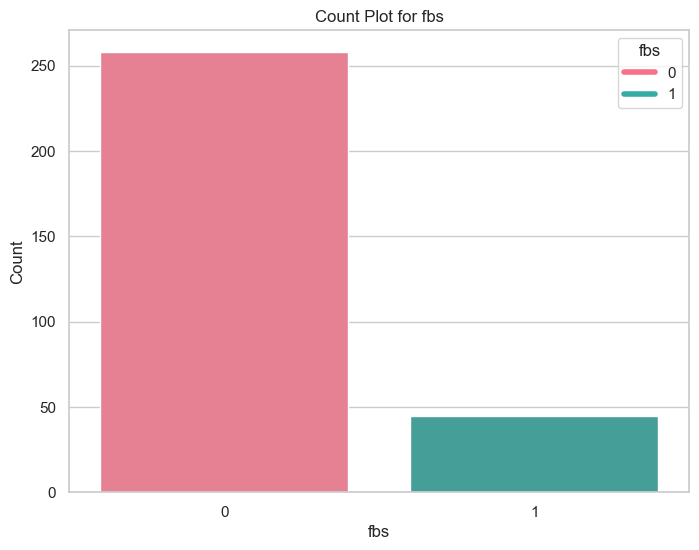

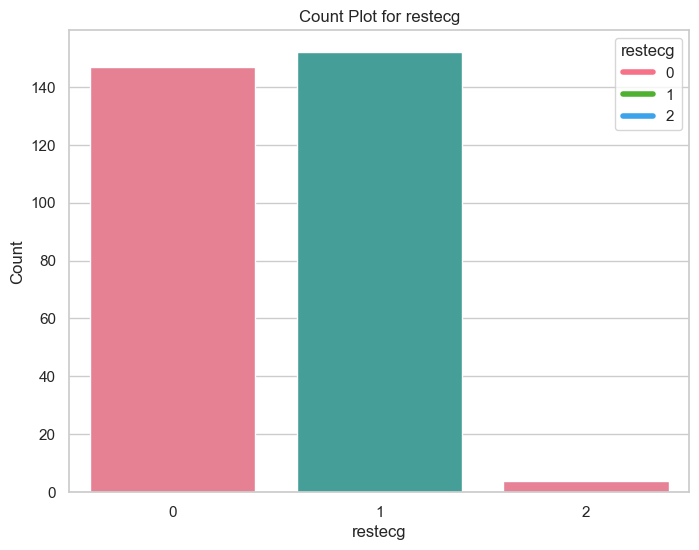

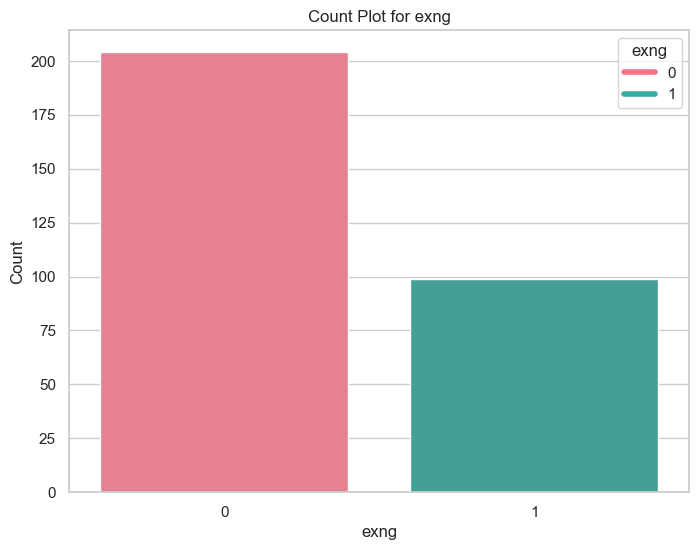

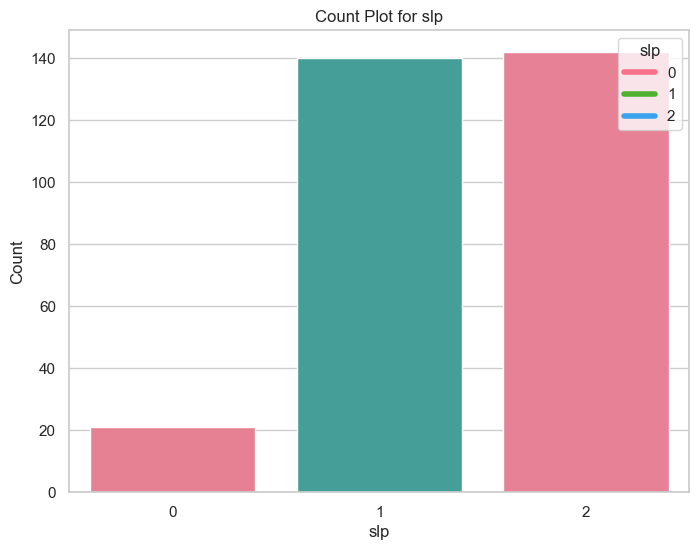

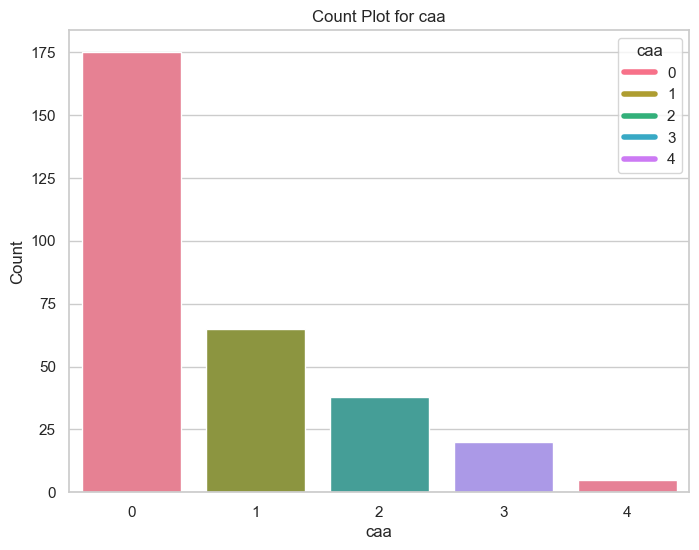

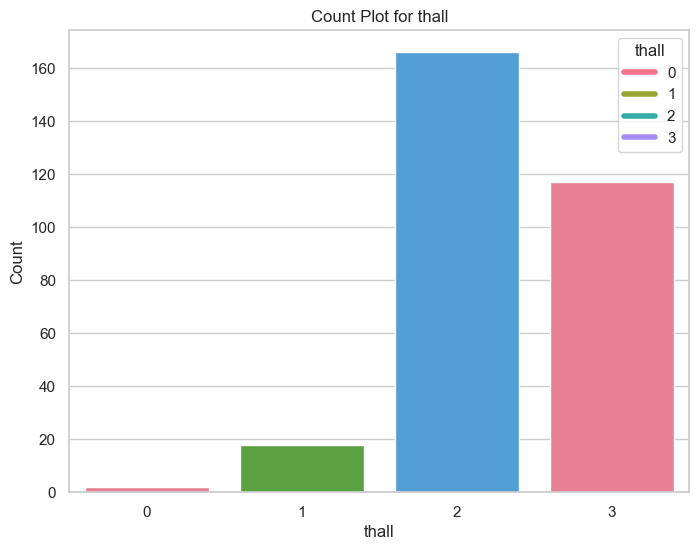

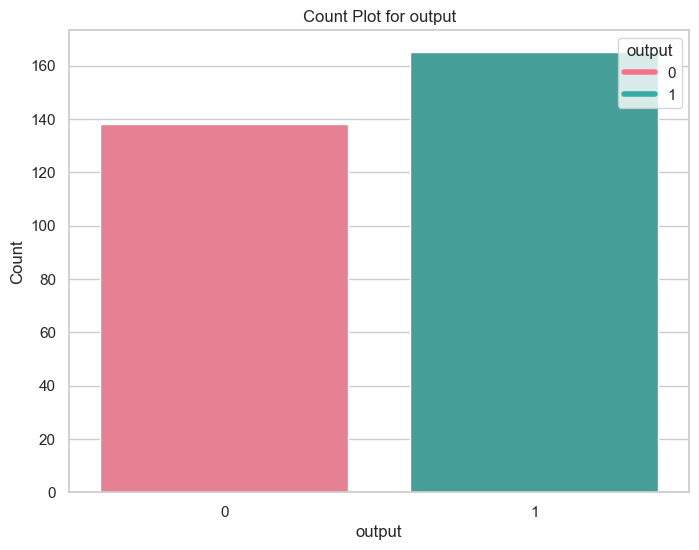

In [23]:
# Set the style for the plots
sb.set(style="whitegrid")

# without modifying the original dataset lets convert 0 & 1 to 
heart_df['sex_category'] = heart_df['sex'].replace({0:'female', 1:'male'})

# List of categorical variables
categorical_vars = ['sex_category', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


# Create count plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    ax = sb.countplot(x=var, data=heart_df, palette="husl", hue=var, dodge=False, legend=False)
    plt.title(f'Count Plot for {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    
    # Adding legend
    unique_labels = sorted(heart_df[var].unique())
    handles = [plt.Line2D([0,0], [0,0], color=sb.color_palette("husl", len(unique_labels))[i], lw=4) 
               for i in range(len(unique_labels))]
    
    labels = unique_labels
    plt.legend(handles=handles, labels=labels, title=var, loc='upper right')
    
    plt.show()


#### Question: What can you conclude from the plots you created? Are there any interesting findings?

<span style = "color:green">
There are more males than there are females for this conduction. 
There is also distinguished difference between people who have fasting sugar and people who exercise induced angina with those that do not have either one these attributes. 
    
 <br> 
 
There seems to be some descending trend in for the plot that represents the number of major vessels. There are more count for 0 vessels and the count for these vessels decrease as we reach the last count for them.
    
<br> 
The output seem to have a balance ratio between '0' and '1'. Meaning that thre is an equal amount of people who are more prone to a heart attack than those who are not. 

### Step 4

Create box plots by outcome for each of your **continuous variables**. Here’s an example of age
and chol:

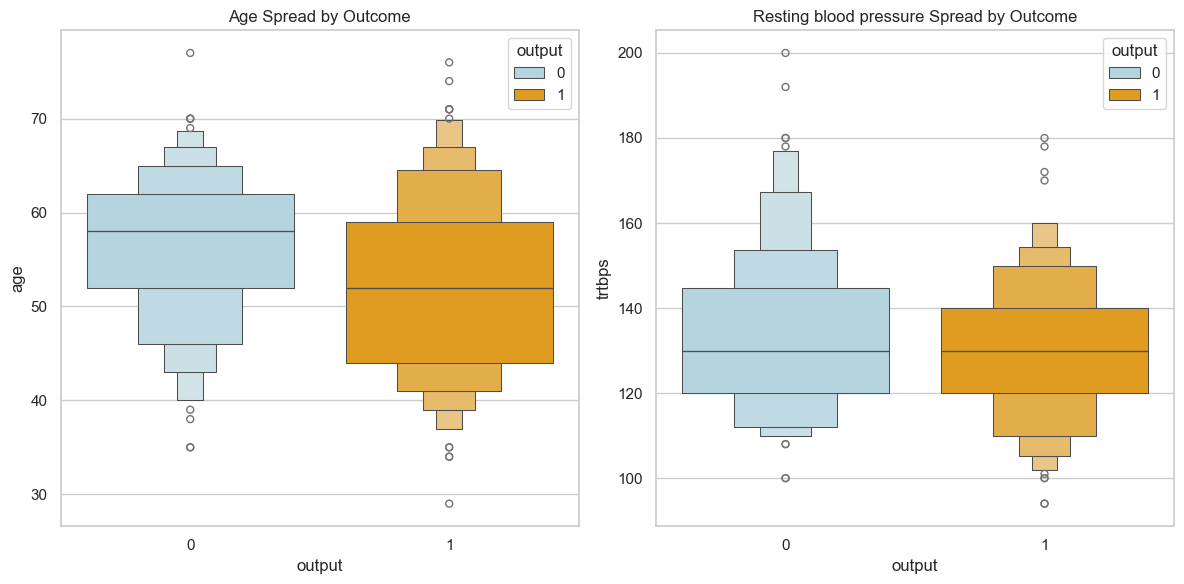

In [28]:
# Set up the matplotlib figure (Letter-Value Box Plot)
plt.figure(figsize=(12, 6))

# color pallete 
color_palette = ['lightblue', 'orange']

# Plot letter value (boxen) plot for 'age' by 'output'
plt.subplot(1, 2, 1)
sb.boxenplot(x='output', y='age', hue = 'output', data=heart_df, palette = color_palette)
plt.title('Age Spread by Outcome')

# Plot letter value (boxen) plot for 'chol' by 'output'
plt.subplot(1, 2, 2)
sb.boxenplot(x='output', y='trtbps', hue = 'output', data=heart_df, palette = color_palette)
plt.title('Resting blood pressure Spread by Outcome')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [37]:
# import seaborn as sb
# import matplotlib.pyplot as plt

# # Set up the matplotlib figure for histograms
# plt.figure(figsize=(12, 6))


# # color palette
# color_palette = ['lightblue', 'orange']

# # Plot histogram for 'age' by 'output'
# plt.subplot(1, 2, 1)
# sb.histplot(data=heart_df, x='age', hue='output', multiple='stack', palette=color_palette, bins=20)
# plt.title('Age Distribution by Outcome')
# plt.xlabel('Age')
# plt.ylabel('Count')

# # Plot histogram for 'trtbps' by 'output'
# plt.subplot(1, 2, 2)
# sb.histplot(data=heart_df, x='trtbps', hue='output', multiple='stack', palette=color_palette, bins=20)
# plt.title('Resting Blood Pressure Distribution by Outcome')
# plt.xlabel('Resting Blood Pressure (trtbps)')
# plt.ylabel('Count')

# # Adjust layout and show plot
# plt.tight_layout()
# plt.show()


#### Question: What can you conclude from the plots you created? Are there any interesting findings?

By looking at this boxplots I can interpret that there is some skewedness for the people who test for least prone to getting a heart attack. <br>

For the age spread by the outcome there is a negative skwedness(left skew) as there more people who are younger than the average mean age. <br>

For the resting blood pressure spread by the outcome there is positive skwedness. This means that there people whose resting blood pressure is hi


### Step 5

Create distribution plots by outcome for each of your continuous variables. Here’s an example
of trtbps and cp:

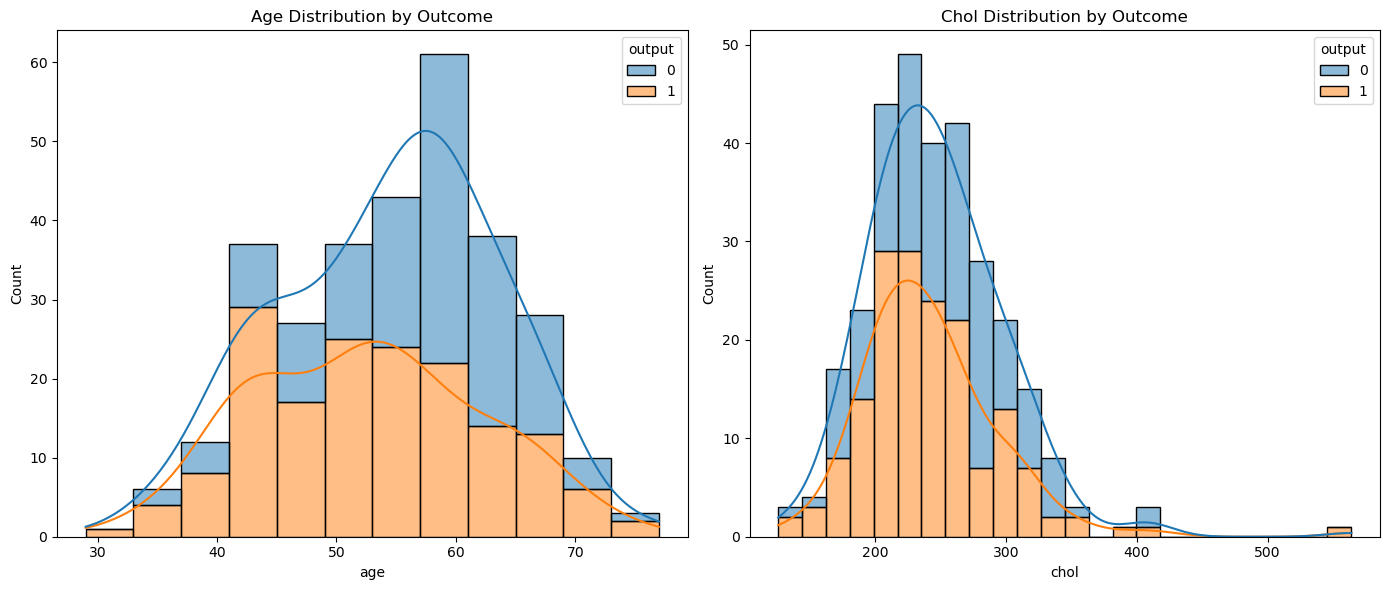

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot distribution plot for 'age' by 'output'
plt.subplot(1, 2, 1)
sb.histplot(data=heart_df, x='age', hue='output', kde=True, multiple="stack")
plt.title('Age Distribution by Outcome')

# Plot distribution plot for 'chol' by 'output'
plt.subplot(1, 2, 2)
sb.histplot(data=heart_df, x='chol', hue='output', kde=True, multiple="stack")
plt.title('Chol Distribution by Outcome')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Question: What can you conclude from the plots you created? Are there any interesting findings?

### Step 6 

Create a heatmap of your data. Here’s an example:

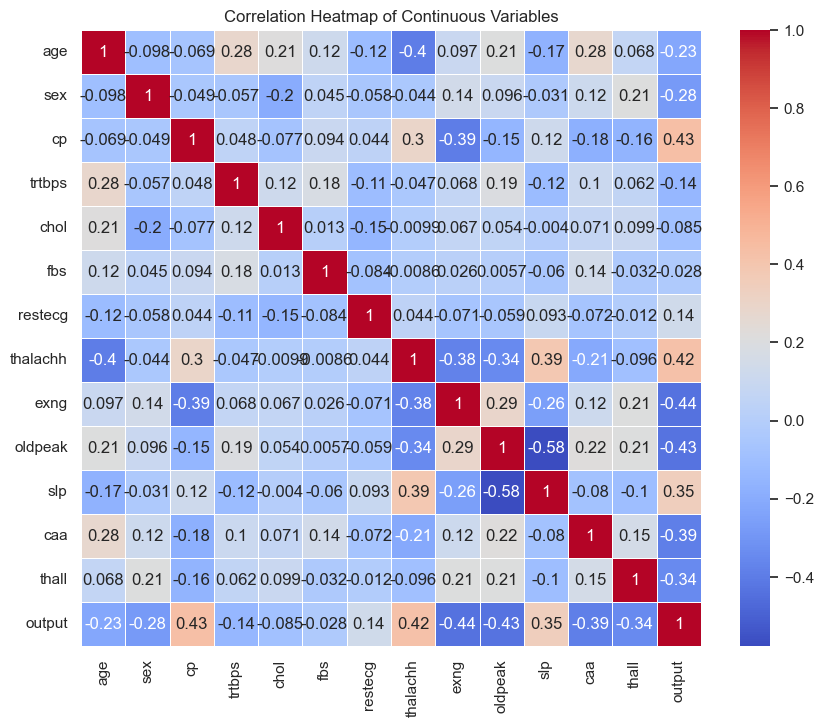

In [19]:
# Compute the correlation matrix
corr_matrix = heart_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
sb.heatmap(corr_matrix, annot=True,  cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Continuous Variables')

# Show plot
plt.show()

#### Question: What can you conclude from the heatmap you created? Are there any interesting findings? 

In [12]:
Most of the predictors have a weak correlation 

hello


### Step 7

Explore the data a bit on your own and include a few additional graphs of your choice. For
example, here’s a line plot of cp vs. age:

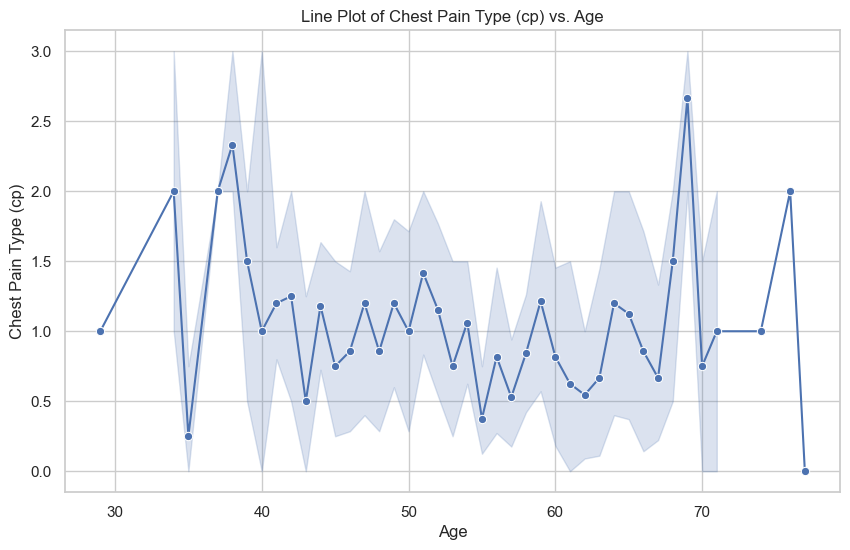

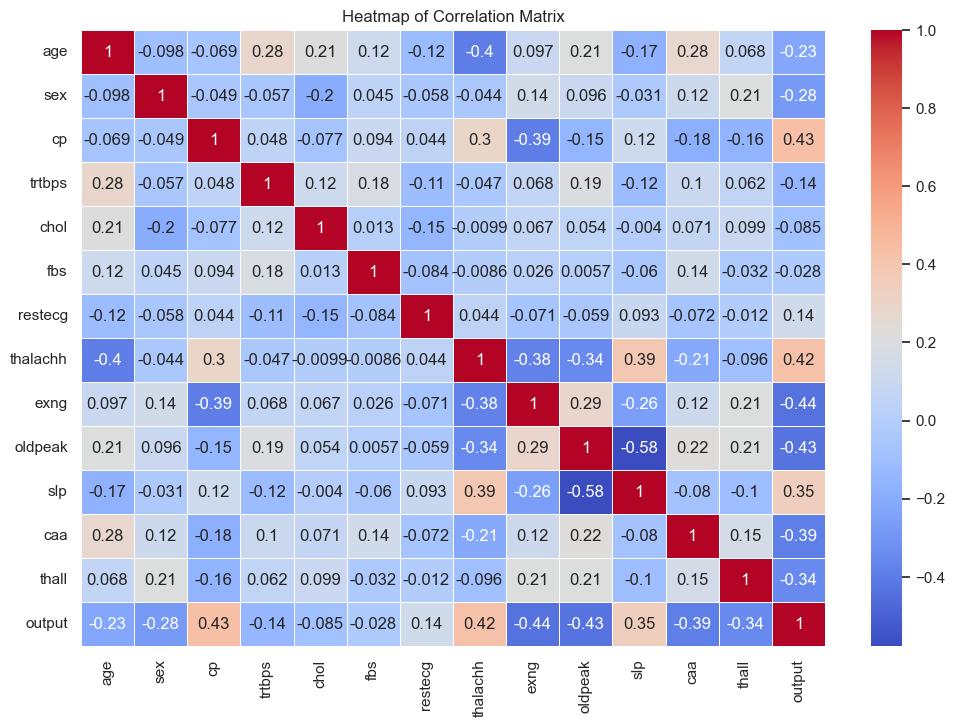

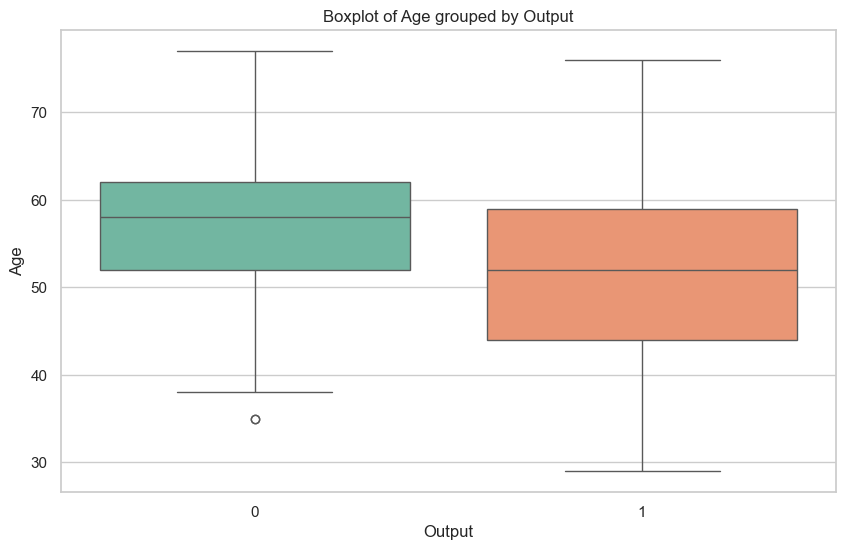

<Figure size 1200x1000 with 0 Axes>

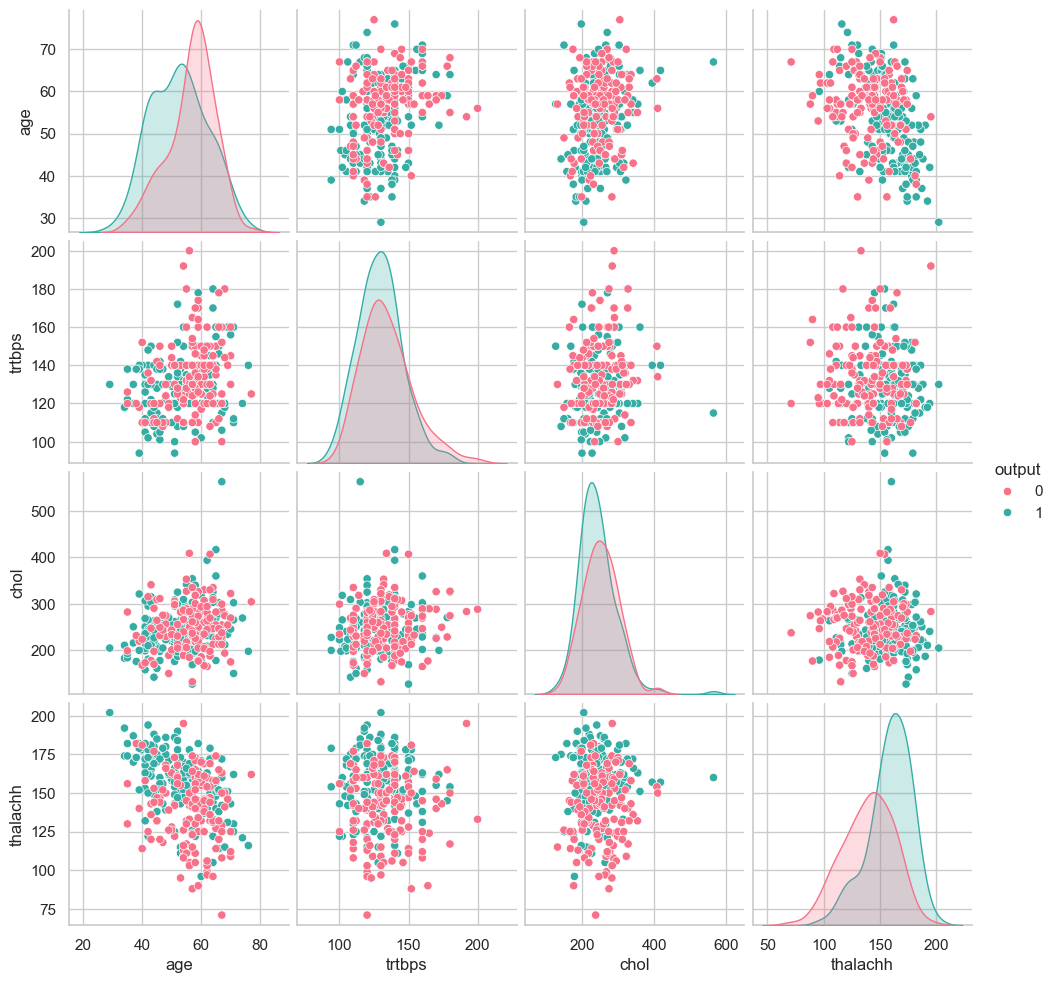

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

# Set the style for the plots
sb.set(style="whitegrid")

# Line plot of cp vs. age
plt.figure(figsize=(10, 6))
sb.lineplot(x='age', y='cp', data=heart_df, marker='o')
plt.title('Line Plot of Chest Pain Type (cp) vs. Age')
plt.xlabel('Age')
plt.ylabel('Chest Pain Type (cp)')
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = heart_df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Boxplot of age grouped by output
plt.figure(figsize=(10, 6))
sb.boxplot(x='output', y='age', data=heart_df, palette="Set2", hue=var, dodge=False, legend=False)
plt.title('Boxplot of Age grouped by Output')
plt.xlabel('Output')
plt.ylabel('Age')
plt.show()

# Pairplot to see relationships between some numerical variables
plt.figure(figsize=(12, 10))
sb.pairplot(heart_df, vars=['age', 'trtbps', 'chol', 'thalachh'], hue='output', palette="husl")
plt.show()


#### Question: What can you conclude from the plots that you created? Did you find anything interesting?

### Step 8

#### Question: Name two different models that you can use to solve the problem statement.

 #### Question: What is the difference between label encoding and one hot encoding, and when should you use one over the other?

#### Question: What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data?

#### Question: Why is scaling data important?

#### Question: For the two different models that you named earlier, are they using a parametric or non- parametric learning algorithms? What’s the difference?

#### Question: Suppose that we had missing values in our dataset. What are different ways we could handle them?

### Step 9

Choose 2 different models to solve the problem statement. Apply any necessary encoding,
scaling, and train test splits to your data and construct the 2 models you selected. Provide
a classification report and confusion matrix for both models. 

#### Do the following 
##### Write a conclusion (~1 paragraph) detailing the main points you discovered while exploring the data. Also include things like: Did you scale your data? If so, which scaling method did you use and why? Is there a specific reason you selected these 2 models? How did the 2 models compare against each other? 

Note: Be sure to use cross validation when comparing models. See sklearn’s
cross_val_score if you’re stuck.